1. We observe an exponential growth in the traffic with respect to years, which validates our hypothesis.
2. 2nd hypothesis, increase in traffic from Apr to Sep
3. traffic increases from 11 am to 7 pm
4. 4th hypothesis, weekday traffic is more than weekend due to office hours

Naive : RMSE : 136
Simple expo RMSE 113
Holt Linear 112

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [4]:
# We have 18 288 different records for the Count of passengers in train set and 5 112 in test set.

# Feature Extraction

In [5]:
train_orig = train.copy()
test_orig = test.copy()

In [6]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [7]:
# change to datetime format
train["Datetime"] = pd.to_datetime(train.Datetime, format="%d-%m-%Y %H:%M")
test["Datetime"] = pd.to_datetime(test.Datetime, format="%d-%m-%Y %H:%M")
train_orig["Datetime"] = pd.to_datetime(train_orig.Datetime, format="%d-%m-%Y %H:%M")
test_orig["Datetime"] = pd.to_datetime(test_orig.Datetime, format="%d-%m-%Y %H:%M")

In [8]:
from datetime import datetime  

In [9]:
for i in(train,test,train_orig,test_orig):
    i["year"]=i.Datetime.dt.year
    i["month"]=i.Datetime.dt.month
    i["day"] = i.Datetime.dt.day
    i["hour"] = i.Datetime.dt.hour

In [10]:
# Extract day of week from Datetime, then based on values we'll assign whether the day is a wkend OR not


In [11]:
train["day of week"] = train.Datetime.dt.dayofweek

In [12]:
def weekend(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0

temp = train["Datetime"].apply(weekend)
train["weekend"]=temp

In [13]:
#set index

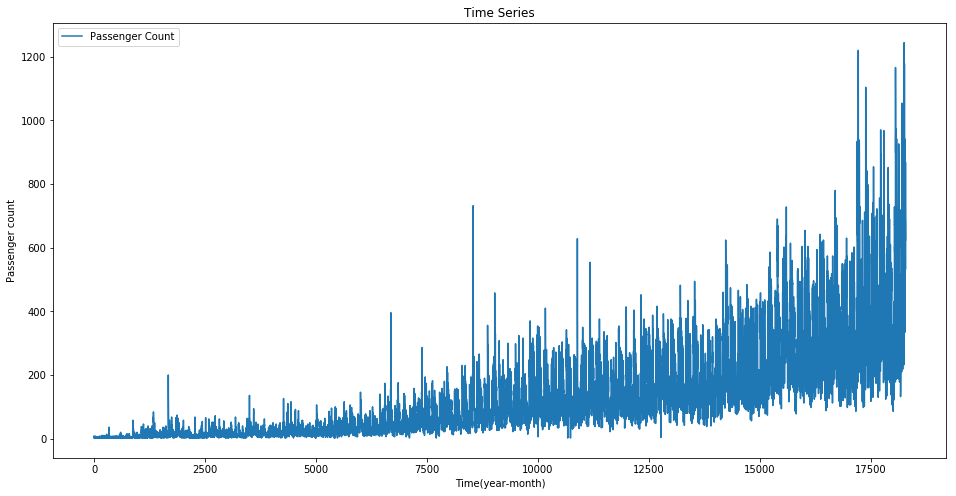

In [14]:
train.set_index("Datetime")
df= train.drop("ID", axis=1)
ts= df["Count"]
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

Here we can observe that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high

# Exploratory Analysis

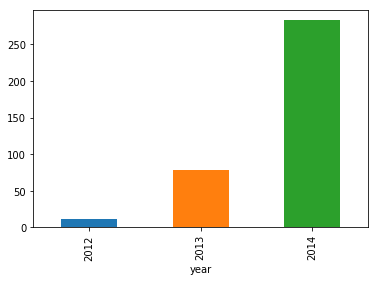

In [15]:
# Based on our 1st hypothesis, traffic will increase as years passby
train.groupby("year")["Count"].mean().plot.bar()

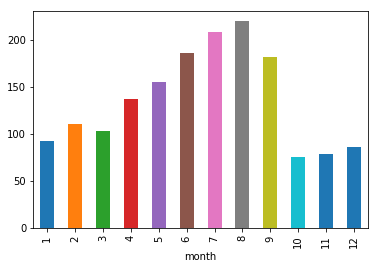

In [16]:
# 2nd hypothesis, increase in traffic from Apr to Sep
train.groupby("month").Count.mean().plot.bar()

Here we observe a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

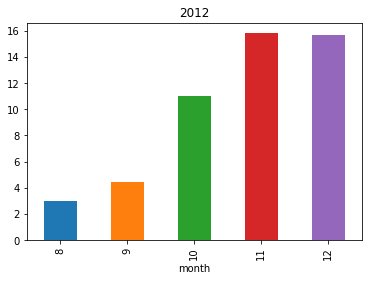

In [17]:
train[train.year==2012].groupby("month").Count.mean().plot.bar(title="2012")

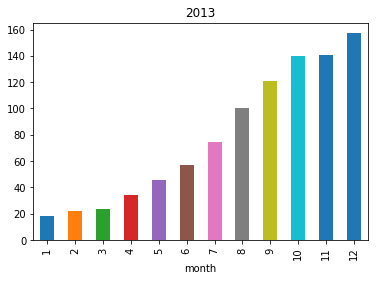

In [18]:
train[train.year==2013].groupby("month").Count.mean().plot.bar(title="2013")

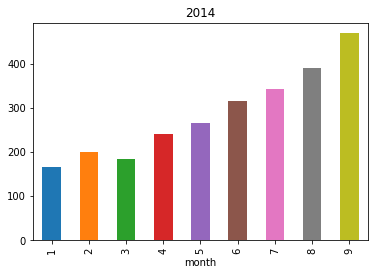

In [19]:
train[train.year==2014].groupby("month").Count.mean().plot.bar(title="2014")

We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.

Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

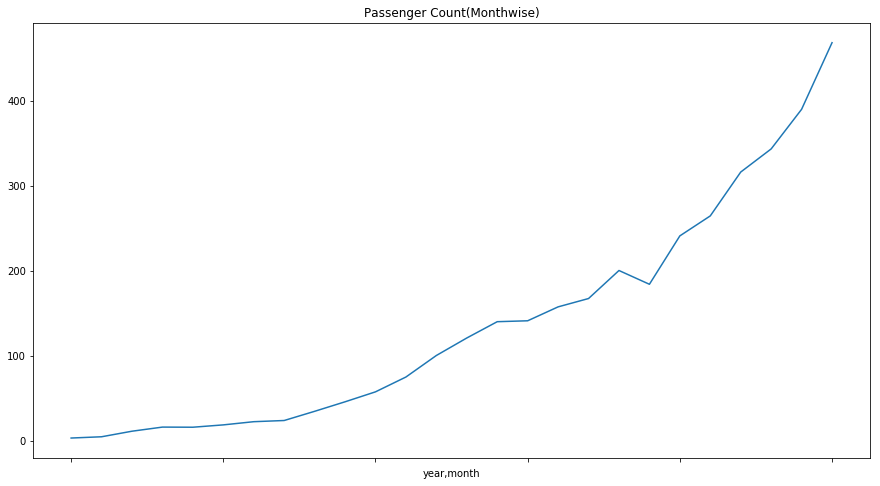

In [20]:
train.groupby(["year","month"])["Count"].mean().plot(title="Passenger Count(Monthwise)", figsize=(15,8))

In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

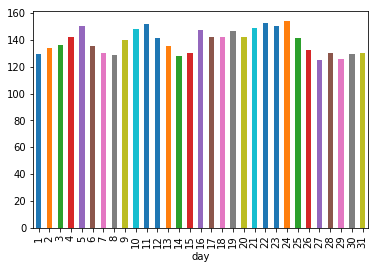

In [21]:
# Daily mean, though find no information as such
train.groupby("day")["Count"].mean().plot.bar()

3rd hypothesis, traffic will increase during peak hours

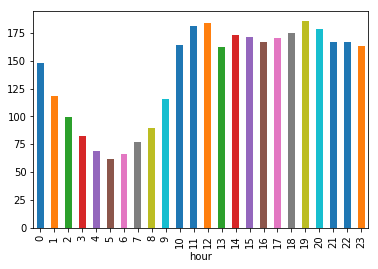

In [22]:
train.groupby("hour")["Count"].mean().plot.bar()

traffic increases from 11 am to 7 pm

 4th hypothesis, weekday traffic is more than weekend due to office hours

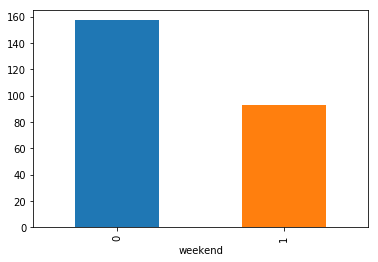

In [23]:
train.groupby("weekend")["Count"].mean().plot.bar()

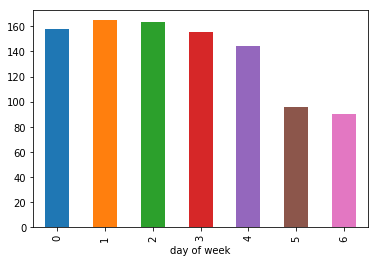

In [24]:
# checked from one date of calendar manually, here 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.
train.groupby("day of week")["Count"].mean().plot.bar()

weekdays have more traffic than sat & sunday

In [25]:
# now start modelling & drop ID variable
train = train.drop("ID", axis=1)

In [26]:
train.head()

,Datetime,Count,year,month,day,hour,day of week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [27]:
train.Timestamp = pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
train.index = train.Timestamp

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [28]:
train.head()

,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [29]:
#hourly time series
hourly = train.resample("H").mean()

#daily time series
daily = train.resample("D").mean()

#weekly ts
weekly=train.resample("W").mean()

#monthly time series
monthly = train.resample("M").mean()



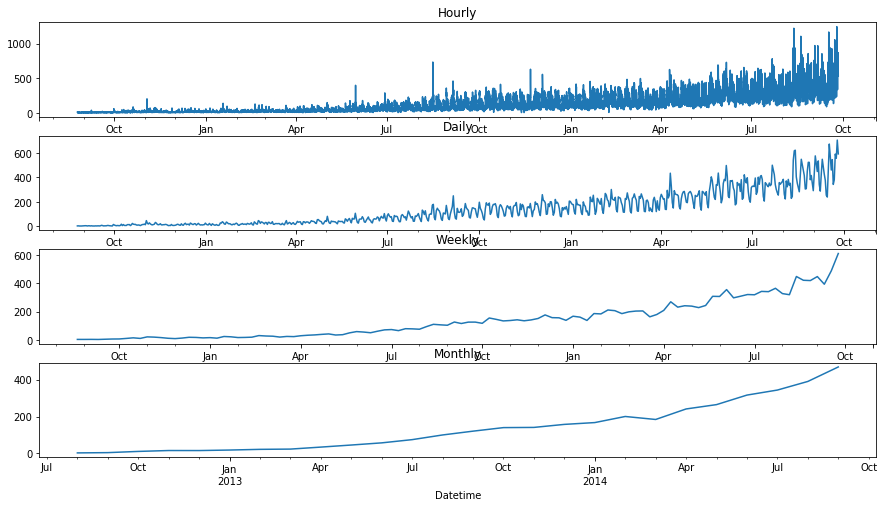

In [30]:
fig,axs= plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title="Hourly", ax=axs[0])
daily.Count.plot(figsize=(15,8), title="Daily", ax=axs[1])
weekly.Count.plot(figsize=(15,8), title="Weekly", ax=axs[2])
monthly.Count.plot(figsize=(15,8), title="Monthly", ax=axs[3])

# series become more stable when we make it daily hourly to daily to weekly to monthly
better to work on daily data

In [32]:
train = train.resample("D").mean()

In [33]:
test.Timestamp = pd.to_datetime(test.Datetime, format="%d-%m-%Y %H:%M")
test.index = test.Timestamp
test = test.resample("D").mean()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [34]:
test.head()

,ID,year,month,day,hour
Datetime,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


In [ ]:
# Creating traing & test set from main train set to check the validation

In [35]:
train_set = train.loc["2012-08-25":"2014-06-24"]
test_set= train.loc["2014-06-25":]

# Let’s visualize the data (train and test together) to know how it varies over a time period.

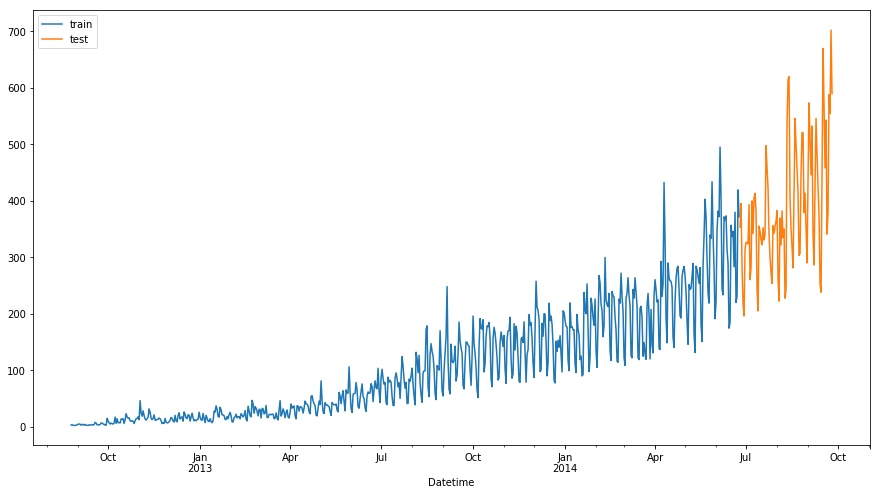

In [36]:
train_set.Count.plot(figsize=(15,8),label="train")
test_set.Count.plot(figsize=(15,8),label="test")
plt.legend(loc="best")
plt.show()

# Modelling

Naive modelling

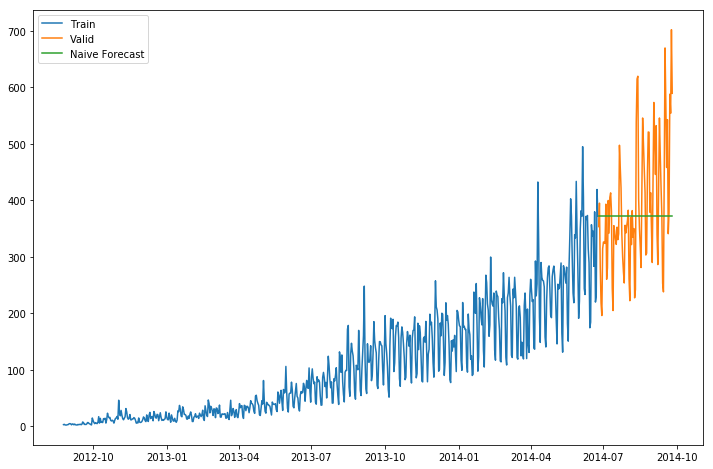

In [37]:
dd = np.asarray(train_set.Count)
y_hat = test_set.copy()

y_hat["naive"] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train_set.index, train_set['Count'], label='Train')
plt.plot(test_set.index,test_set['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')

plt.show()

In [ ]:
# check rmse

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
print("RMSE = %f"%(np.sqrt(mean_squared_error(test_set.Count, y_hat.naive))))

RMSE = 111.790505


In [ ]:
# try reducing RMSE using rolling_mean

RMSE = 134.237333


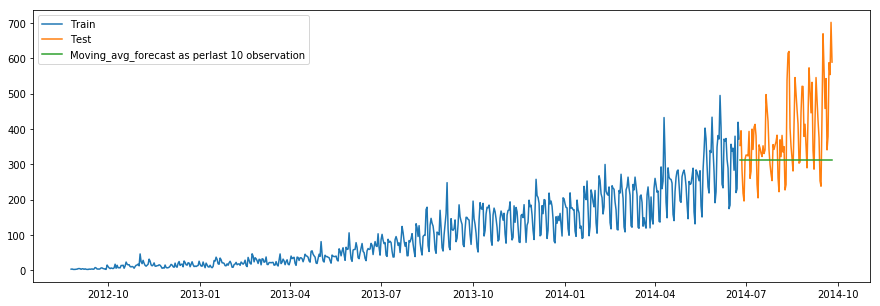

In [40]:
y_hat = test_set.copy()
y_hat["Moving_avg_forecast_10"] = train_set["Count"].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(train_set["Count"], label="Train")
plt.plot(test_set["Count"], label="Test")
plt.plot(y_hat["Moving_avg_forecast_10"], label ="Moving_avg_forecast as perlast 10 observation")
plt.legend(loc="best")
print("RMSE = %f"%(np.sqrt(mean_squared_error(test_set.Count, y_hat.Moving_avg_forecast_10))))
plt.show()

RMSE = 130.449850


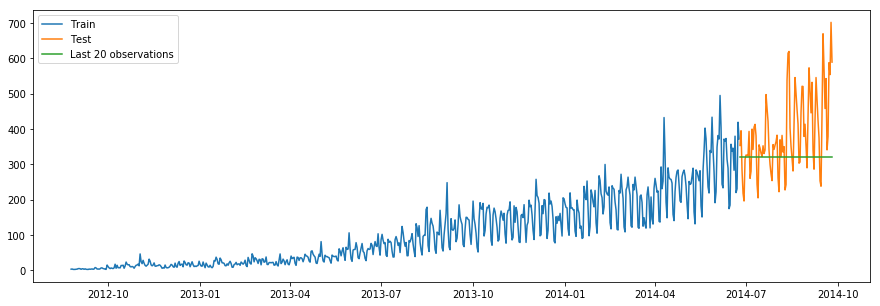

In [41]:
y_hat["Moving_avg_forecast_20"] = train_set["Count"].rolling(20).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(train_set["Count"], label="Train")
plt.plot(test_set["Count"], label="Test")
plt.plot(y_hat["Moving_avg_forecast_20"], label="Last 20 observations")
plt.legend(loc="best")

print("RMSE = %f"%(np.sqrt(mean_squared_error(test_set.Count, y_hat.Moving_avg_forecast_20))))
plt.show()

RMSE = 144.191757


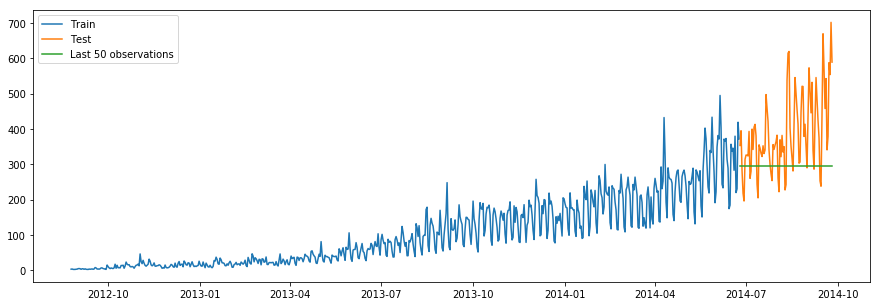

In [42]:
y_hat["Moving_avg_forecast_50"] = train_set["Count"].rolling(50).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(train_set["Count"], label="Train")
plt.plot(test_set["Count"], label="Test")
plt.plot(y_hat["Moving_avg_forecast_50"], label="Last 50 observations")
plt.legend(loc="best")

print("RMSE = %f"%(np.sqrt(mean_squared_error(test_set.Count, y_hat.Moving_avg_forecast_50))))
plt.show()

In [ ]:
# predictions are getting weeker as we increase observations

# Simple Exponenetial smoothening

it may be sensible to attach larger weights to more recent observations than to observations from the distant past.

In [43]:

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

RMSE = 113.437081


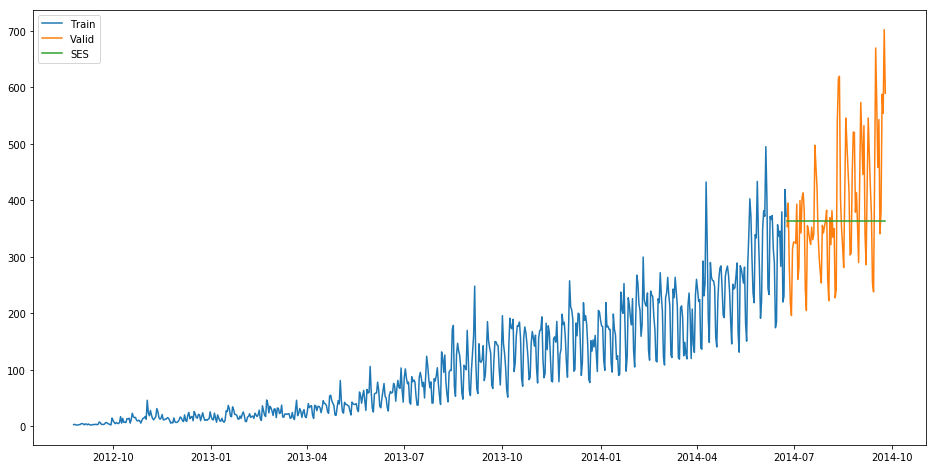

In [45]:

fit_exp = SimpleExpSmoothing(np.asarray(train_set['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit_exp.forecast(len(test_set))
plt.figure(figsize=(16,8))
plt.plot(train_set['Count'], label='Train')
plt.plot(test_set['Count'], label='Valid')
plt.plot(y_hat['SES'], label='SES')
plt.legend(loc='best')
print("RMSE = %f"%(np.sqrt(mean_squared_error(test_set.Count, y_hat.SES))))
plt.show()

RMSE value has decreased mean model has improved

# Try Holts linear model
If we use any of the above methods, it won’t take into account this trend. Trend is the general pattern of prices that we observe over a period of time. In this case we can see that there is an increasing trend.

Although each one of these methods can be applied to the trend as well.  E.g. the Naive method would assume that trend between last two points is going to stay the same, or we could average all slopes between all points to get an average trend, use a moving trend average or apply exponential smoothing.

But we need a method that can map the trend accurately without any assumptions. Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method.

In [ ]:
# first decompose series to check trend

In [46]:
import statsmodels.api as sm

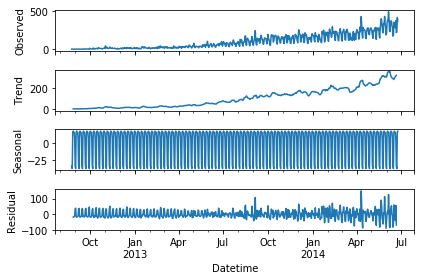

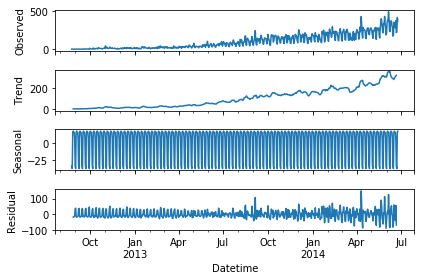

In [47]:
sm.tsa.seasonal_decompose(train_set.Count).plot()

In [ ]:
# increasing trend is there so try Holt Linear method

RMSE = 112.942783


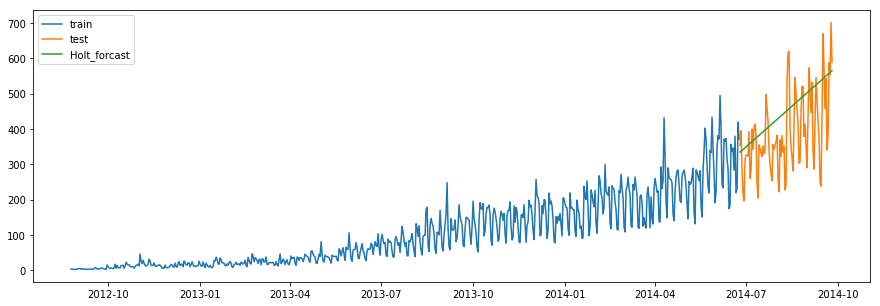

In [48]:
fit_holt = Holt(np.asarray(train_set.Count)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat["Holt_forcast"] = fit_holt.forecast(len(test_set))

plt.figure(figsize=(15,5))
plt.plot(train_set["Count"], label="train")
plt.plot(test_set["Count"], label="test")
plt.plot(y_hat["Holt_forcast"], label="Holt_forcast")
plt.legend(loc="best")
print("RMSE = %f"%(np.sqrt(mean_squared_error(test_set.Count, y_hat.Holt_forcast))))
plt.show()

# We notice the rmse value has decreased.

In [49]:
#  prediction for the test set
predict_holt =fit_holt.forecast(len(test))

In [50]:
# Saving our pred in test file in a new column
test['prediction'] = predict_holt

In [51]:
# Calculating the hourly ratio of count
train_orig['ratio']=train_orig['Count']/train_orig['Count'].sum()

# Grouping the hourly ratio
temp=train_orig.groupby(['hour'])['ratio'].sum()

# Groupby to csv format
pd.DataFrame(temp, columns=['hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('hour.1',1)

# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_orig, on=('day','month', 'year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [52]:
# Drop all other features from submission file and keep ID and Count
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','hour', 'ratio'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

# Holts Winters Method
The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

In this method also, we can implement both additive and multiplicative technique.  The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series.


RMSE = 82.376845


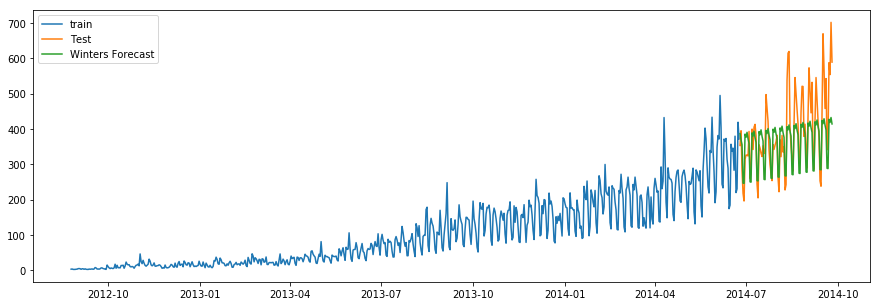

In [53]:
# seasonal_periodsint, optional, The number of periods in a complete seasonal cycle, e.g., 4 for quarterly data or 7 for daily data with a weekly cycle.
fit_winter = ExponentialSmoothing(np.asarray(train_set["Count"]), seasonal_periods=7 , seasonal='add', trend='add').fit()
y_hat["Winters_forecast"]= fit_winter.forecast(len(test_set))

plt.figure(figsize=(15,5))
plt.plot(train_set.Count, label="train")
plt.plot(test_set.Count, label="Test")
plt.plot(y_hat.Winters_forecast, label="Winters Forecast")
plt.legend(loc="best")
print("RMSE = %f"%(np.sqrt(mean_squared_error(test_set.Count, y_hat.Winters_forecast))))
plt.show()

In [ ]:
# We notice the rmse value has decreased from 112 to 82

In [54]:
#  prediction for the test set
predict_winter =fit_winter.forecast(len(test))

In [55]:
# Saving our pred in test file in a new column
test['prediction_winter'] = predict_winter

In [56]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_orig, on=('day','month', 'year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

# Drop all other features from submission file and keep ID and Count
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','hour', 'ratio'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

In [57]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    
    #plot rolling stats
    rolling_mean = ts.rolling(30).mean()
    rolling_std = ts.rolling(30).std()
    
    plt.plot(ts, label="Original", Color="Blue")
    plt.plot(rolling_mean,  label="Rolling mean", Color="Red")
    plt.plot(rolling_std,  label="Rolling std", Color="black")
    plt.show()
    
    
    # augmented Dickey Fuller Test
    dftest = adfuller(ts)
    dfoutput =pd.Series(dftest[0:4],index=["T stat","p-value","lags","observation"])
    
    for key,value in dftest[4].items():
        dfoutput["Critical value :{%s}"%key]=value
    
    print(dfoutput)

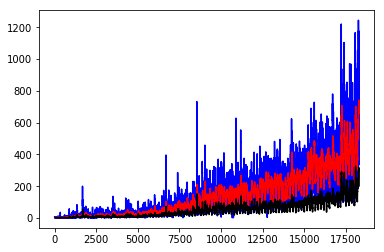

T stat                      -4.456561
p-value                      0.000235
lags                        45.000000
observation              18242.000000
Critical value :{1%}        -3.430709
Critical value :{5%}        -2.861698
Critical value :{10%}       -2.566854
dtype: float64


In [58]:
test_stationarity(train_orig['Count'])

# To improve scores lets use transformations & make series stationary

We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

In [ ]:
# we can see this is stationary time series but we can see increasing trend in data, so lets try removing trend

In [59]:
train_log = np.log(train_set['Count'])
test_log = np.log(test_set['Count'])

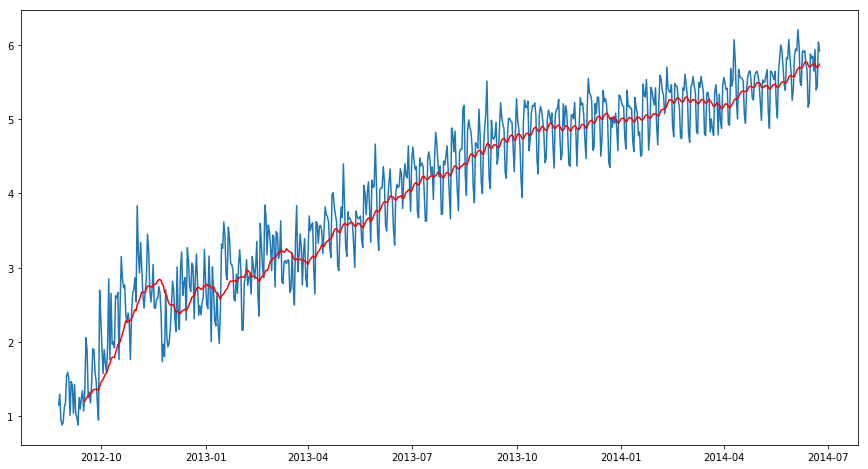

In [60]:
moving_avg = train_log.rolling(24).mean()
plt.figure(figsize=(15,8))
plt.plot(train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [61]:
train_log_moving_avg_diff = train_log - moving_avg

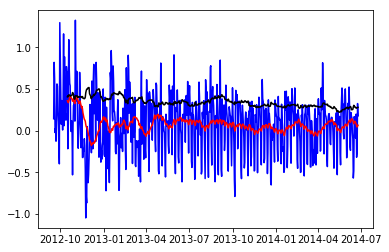

T stat                  -5.861646e+00
p-value                  3.399422e-07
lags                     2.000000e+01
observation              6.250000e+02
Critical value :{1%}    -3.440856e+00
Critical value :{5%}    -2.866175e+00
Critical value :{10%}   -2.569239e+00
dtype: float64


In [62]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

Lets remove seasonality now

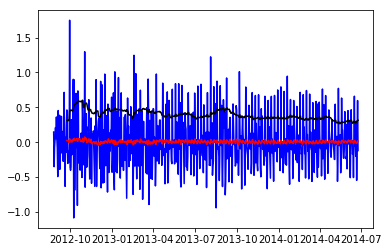

T stat                  -8.237568e+00
p-value                  5.834049e-13
lags                     1.900000e+01
observation              6.480000e+02
Critical value :{1%}    -3.440482e+00
Critical value :{5%}    -2.866011e+00
Critical value :{10%}   -2.569151e+00
dtype: float64


In [63]:
# Differencing to remove seasonality
train_log_diff = train_log - train_log.shift(1)
train_log_diff.dropna(inplace=True)
test_stationarity(train_log_diff.dropna())

In [ ]:
# now decompose time series and check if residual is stationary

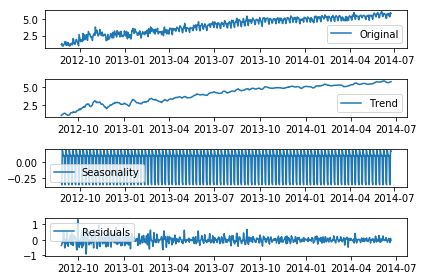

In [64]:
decomposition = sm.tsa.seasonal_decompose(train_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [65]:
# Stationarity of residuals
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)


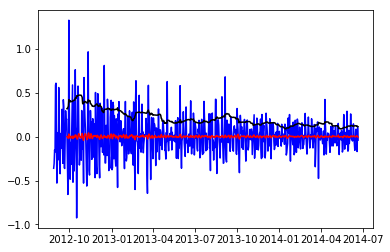

T stat                  -1.069361e+01
p-value                  3.672244e-19
lags                     2.000000e+01
observation              6.420000e+02
Critical value :{1%}    -3.440577e+00
Critical value :{5%}    -2.866052e+00
Critical value :{10%}   -2.569173e+00
dtype: float64


In [66]:
test_stationarity(train_log_decompose.Count)

# Residuals are stationary

# Visualizing ACF(autocorrelation Function) and PACF(Partial ACF) graph, these graphs will help in deciding the values of p and q while builidng MA, AR, ARIMA models. p = number of previous observations q = number of previious error values

In [67]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

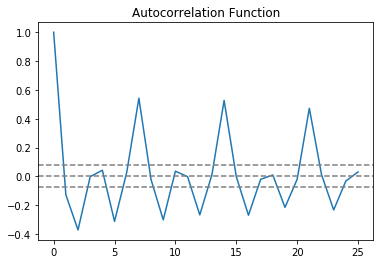

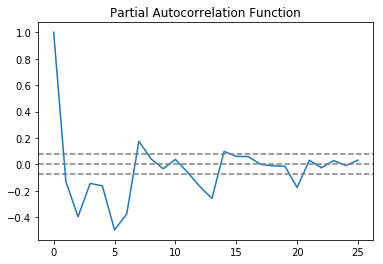

In [68]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

*   p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.

*   q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

*   Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

In [69]:
from statsmodels.tsa.arima_model import ARIMA

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

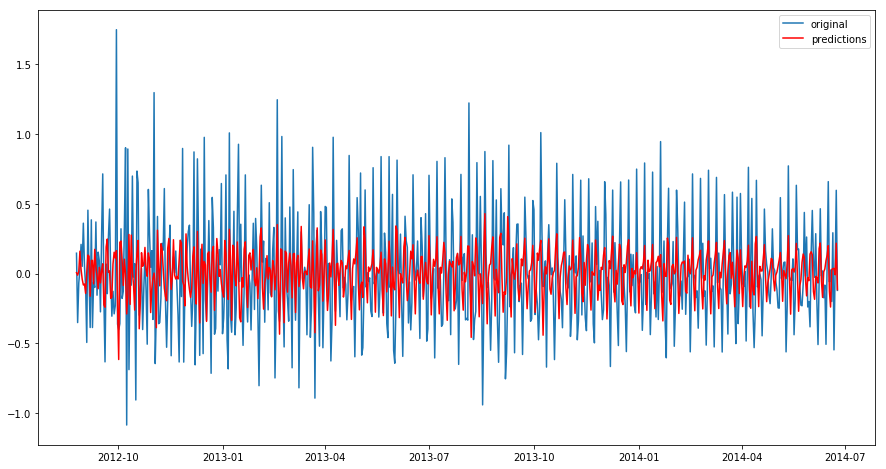

In [70]:
model = ARIMA(train_log, order=(2, 1, 0))                              # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(15,8))
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [71]:
# Store the predicted results as a separate series and observe it
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(test_set.shape[0]) * np.log(test_set['Count'])[0], index = test_set.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

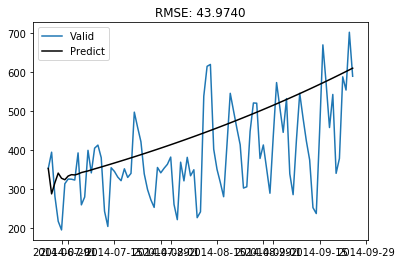

In [72]:
plt.plot(test_set['Count'], label = "Valid")
plt.plot(AR_predict, color = 'black', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, test_set['Count']))/test_set.shape[0]))
plt.show()

# # MA Model

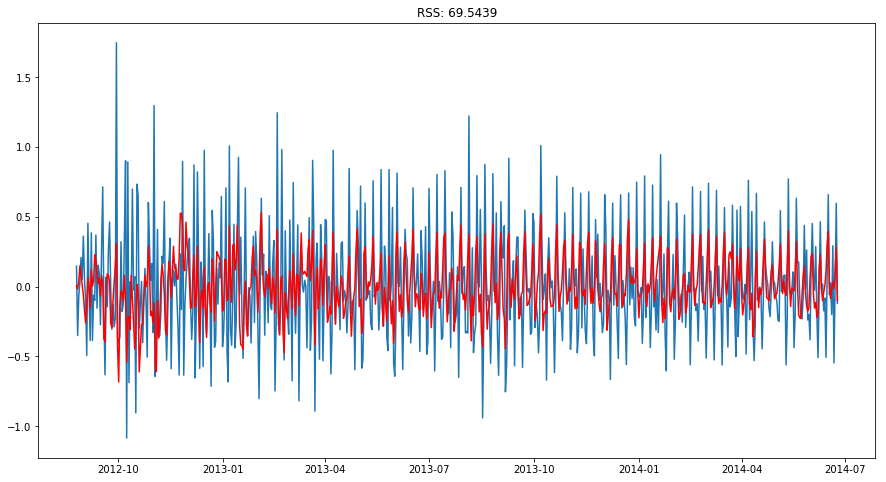

In [73]:
model_ma = ARIMA(train_log, order=(0,1,2))
model_ma_fit = model_ma.fit()
plt.figure(figsize=(15,8))
plt.plot(train_log_diff)
plt.plot(model_ma_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_ma_fit.fittedvalues-train_log_diff)**2))
plt.show()

In [74]:
# predicting using MA model
MA_predict=model_ma_fit.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(test_set.shape[0]) * np.log(test_set['Count'])[0], index = test_set.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

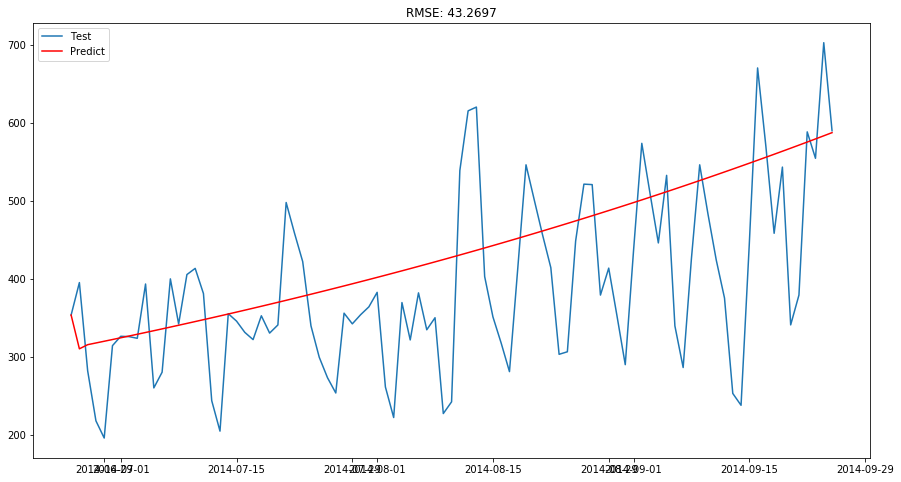

In [75]:
# Validating the MA model
plt.figure(figsize=(15,8))
plt.plot(test_set['Count'], label = "Test")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, test_set['Count']))/test_set.shape[0]))
plt.show()

In [ ]:
# Check ARIMA

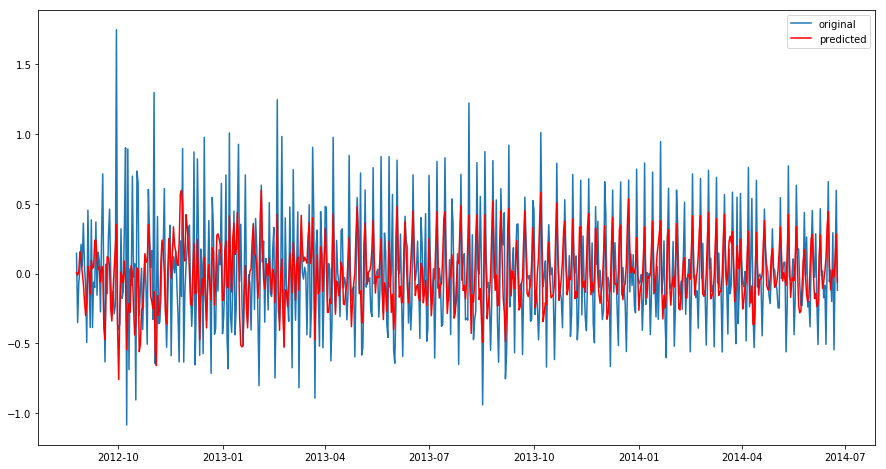

In [76]:
model = ARIMA(train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(15,8))
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [77]:
# predicting using ARIMA model
ARIMA_predict=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
ARIMA_predict=ARIMA_predict.cumsum().shift().fillna(0)
ARIMA_predict1=pd.Series(np.ones(test_set.shape[0]) * np.log(test_set['Count'])[0], index = test_set.index)
ARIMA_predict1=ARIMA_predict1.add(ARIMA_predict,fill_value=0)
ARIMA_predict = np.exp(ARIMA_predict1)

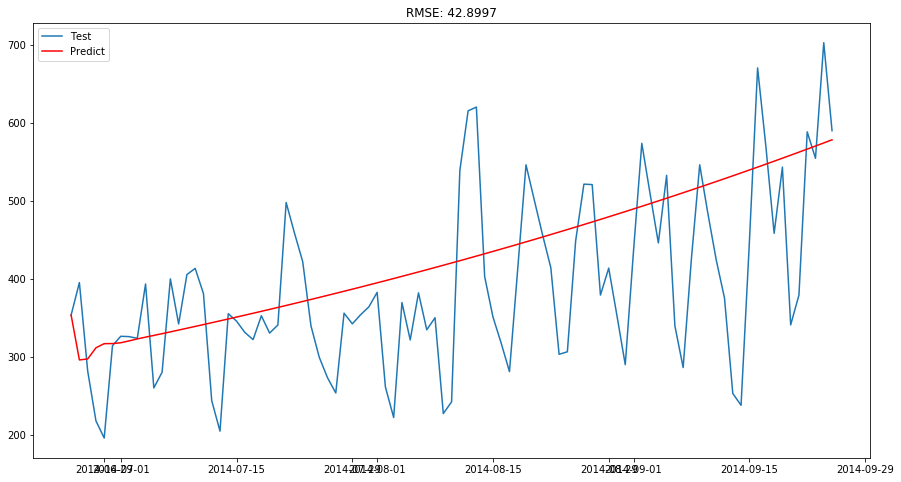

In [78]:
# Validating the ARIMA model
plt.figure(figsize=(15,8))
plt.plot(test_set['Count'], label = "Test")
plt.plot(ARIMA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(ARIMA_predict, test_set['Count']))/test_set.shape[0]))
plt.show()

In [ ]:
# SARIMAX model

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


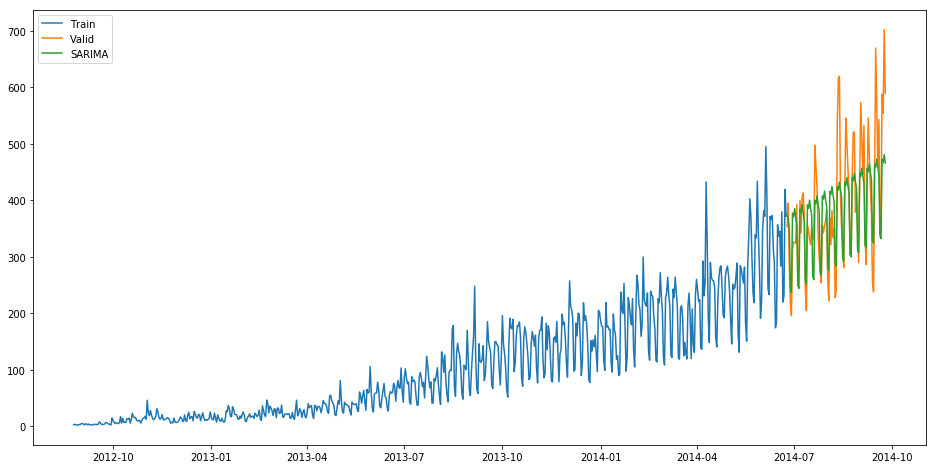

In [79]:
y_hat_avg = test_set.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_set.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train_set['Count'], label='Train')
plt.plot(test_set['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [80]:
rms = np.sqrt(mean_squared_error(test_set.Count, y_hat_avg.SARIMA))
print(rms)

69.84154981047789


In [81]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [82]:
test['prediction'] = predict

In [83]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_orig, on=('day','month', 'year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [84]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')